In [1]:
import pandas as pd

df_sales = pd.read_csv('/content/Sales_Analysis_Data.csv')
print("DataFrame 'df_sales' loaded successfully. Displaying the first 5 rows:")
df_sales.head()

DataFrame 'df_sales' loaded successfully. Displaying the first 5 rows:


,OrderID,DATE,CustomerID,Region,Product,Quantity,UnitPrice,TotalSales
0,1001.0,01-09-2025,CUST046,East,Webcam,10.0,67212.0,672120.0
1,1002.0,05-09-2025,CUST030,East,Webcam,2.0,36249.0,72498.0
2,1003.0,09-09-2025,CUST043,West,Keyboard,2.0,73511.0,147022.0
3,1004.0,13-09-2025,CUST012,North,Router,9.0,12894.0,116046.0
4,1005.0,17-09-2025,CUST004,East,Mouse,4.0,73473.0,293892.0


In [2]:
print("--- DataFrame Information ---")
df_sales.info()

print("\n--- Missing Values per Column ---")
print(df_sales.isnull().sum())

print("\n--- Number of Duplicate Rows ---")
print(df_sales.duplicated().sum())

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     100 non-null    float64
 1   DATE        100 non-null    object 
 2   CustomerID  100 non-null    object 
 3   Region      100 non-null    object 
 4   Product     100 non-null    object 
 5   Quantity    100 non-null    float64
 6   UnitPrice   100 non-null    float64
 7   TotalSales  100 non-null    float64
dtypes: float64(4), object(4)
memory usage: 6.5+ KB

--- Missing Values per Column ---
OrderID       2
DATE          2
CustomerID    2
Region        2
Product       2
Quantity      2
UnitPrice     2
TotalSales    2
dtype: int64

--- Number of Duplicate Rows ---
1


**Reasoning**:
Now that the initial inspection is complete, I will convert the 'DATE' column to datetime objects to ensure proper temporal analysis. After the conversion, I will display the head and info of the DataFrame to verify the changes.



In [3]:
df_sales['DATE'] = pd.to_datetime(df_sales['DATE'], format='%d-%m-%Y', errors='coerce')

print("--- DataFrame after DATE column conversion ---")
print("First 5 rows:")
print(df_sales.head())
print("\nDataFrame Info:")
df_sales.info()

--- DataFrame after DATE column conversion ---
First 5 rows:
   OrderID       DATE CustomerID Region   Product  Quantity  UnitPrice  \
0   1001.0 2025-09-01    CUST046   East    Webcam      10.0    67212.0   
1   1002.0 2025-09-05    CUST030   East    Webcam       2.0    36249.0   
2   1003.0 2025-09-09    CUST043   West  Keyboard       2.0    73511.0   
3   1004.0 2025-09-13    CUST012  North    Router       9.0    12894.0   
4   1005.0 2025-09-17    CUST004   East     Mouse       4.0    73473.0   

   TotalSales  
0    672120.0  
1     72498.0  
2    147022.0  
3    116046.0  
4    293892.0  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     100 non-null    float64       
 1   DATE        100 non-null    datetime64[ns]
 2   CustomerID  100 non-null    object        
 3   Region      100 non-null    obje

In [4]:
df_sales.drop_duplicates(inplace=True)
print("--- DataFrame after removing duplicate rows ---")
print(f"Number of duplicate rows remaining: {df_sales.duplicated().sum()}")
print("Updated DataFrame Info:")
df_sales.info()

--- DataFrame after removing duplicate rows ---
Number of duplicate rows remaining: 0
Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     100 non-null    float64       
 1   DATE        100 non-null    datetime64[ns]
 2   CustomerID  100 non-null    object        
 3   Region      100 non-null    object        
 4   Product     100 non-null    object        
 5   Quantity    100 non-null    float64       
 6   UnitPrice   100 non-null    float64       
 7   TotalSales  100 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 7.1+ KB


In [5]:
df_sales.dropna(inplace=True)

print("--- DataFrame after dropping rows with any missing values ---")
print(f"Number of missing values remaining: {df_sales.isnull().sum().sum()}")
print("Updated DataFrame Info:")
df_sales.info()
print("First 5 rows of the cleaned DataFrame:")
print(df_sales.head())

--- DataFrame after dropping rows with any missing values ---
Number of missing values remaining: 0
Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     100 non-null    float64       
 1   DATE        100 non-null    datetime64[ns]
 2   CustomerID  100 non-null    object        
 3   Region      100 non-null    object        
 4   Product     100 non-null    object        
 5   Quantity    100 non-null    float64       
 6   UnitPrice   100 non-null    float64       
 7   TotalSales  100 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 7.0+ KB
First 5 rows of the cleaned DataFrame:
   OrderID       DATE CustomerID Region   Product  Quantity  UnitPrice  \
0   1001.0 2025-09-01    CUST046   East    Webcam      10.0    67212.0   
1   1002.0 2025-09-05    CUST030   East 

## Transform Data

### Subtask:
Perform data transformations. This will include verifying 'Total Sales' (Price * Quantity) and aggregating the sales data to prepare it for visualization, such as sales per product or sales over time.


In [6]:
df_sales['CalculatedTotalSales'] = df_sales['Quantity'] * df_sales['UnitPrice']

discrepancies = df_sales[df_sales['TotalSales'] != df_sales['CalculatedTotalSales']]

if not discrepancies.empty:
    print("Discrepancies found in 'TotalSales'. Recalculating 'TotalSales'...")
    df_sales['TotalSales'] = df_sales['CalculatedTotalSales']
else:
    print("'TotalSales' column is accurate. No recalculation needed.")

df_sales.drop(columns=['CalculatedTotalSales'], inplace=True)

print("Verification of 'TotalSales' complete. First 5 rows of df_sales:")
print(df_sales.head())

'TotalSales' column is accurate. No recalculation needed.
Verification of 'TotalSales' complete. First 5 rows of df_sales:
   OrderID       DATE CustomerID Region   Product  Quantity  UnitPrice  \
0   1001.0 2025-09-01    CUST046   East    Webcam      10.0    67212.0   
1   1002.0 2025-09-05    CUST030   East    Webcam       2.0    36249.0   
2   1003.0 2025-09-09    CUST043   West  Keyboard       2.0    73511.0   
3   1004.0 2025-09-13    CUST012  North    Router       9.0    12894.0   
4   1005.0 2025-09-17    CUST004   East     Mouse       4.0    73473.0   

   TotalSales  
0    672120.0  
1     72498.0  
2    147022.0  
3    116046.0  
4    293892.0  


In [7]:
sales_by_product = df_sales.groupby('Product')['TotalSales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='TotalSales', ascending=False)
print("Total sales by product (top 5):")
print(sales_by_product.head())

Total sales by product (top 5):
    Product  TotalSales
7    Webcam   4780776.0
1  Keyboard   4726928.0
6    Router   3749558.0
2    Laptop   3598643.0
5   Printer   2934611.0


In [8]:
sales_over_time = df_sales.groupby('DATE')['TotalSales'].sum().reset_index()
sales_over_time = sales_over_time.sort_values(by='DATE')
print("Daily total sales (first 5 entries):")
print(sales_over_time.head())

Daily total sales (first 5 entries):
        DATE  TotalSales
0 2025-09-01    672120.0
1 2025-09-05     72498.0
2 2025-09-09    147022.0
3 2025-09-13    116046.0
4 2025-09-17    293892.0


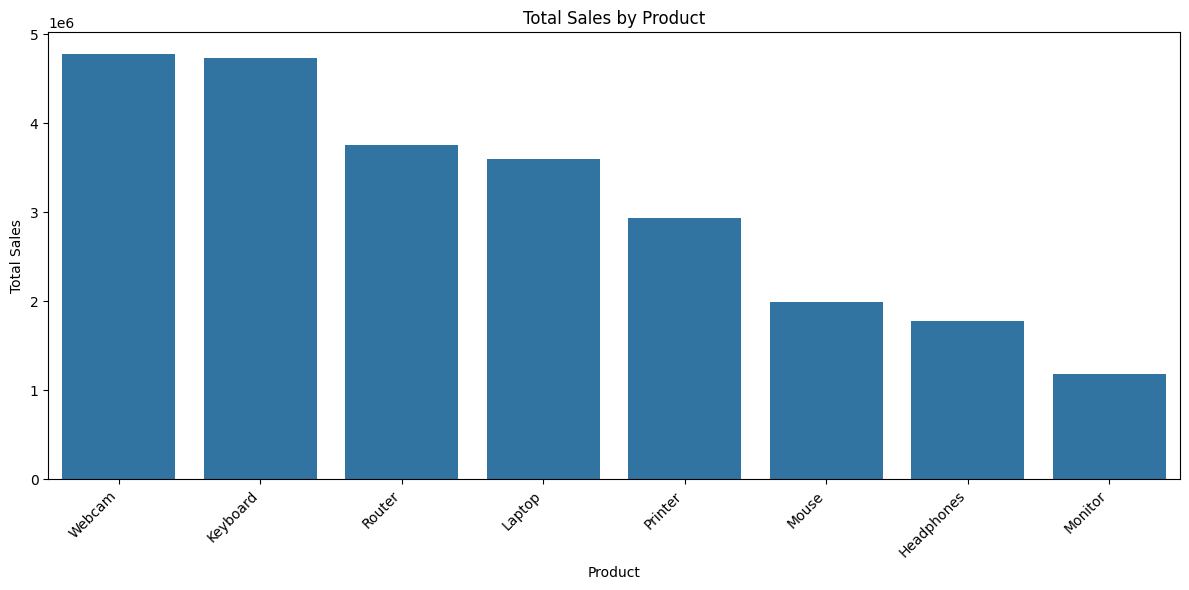

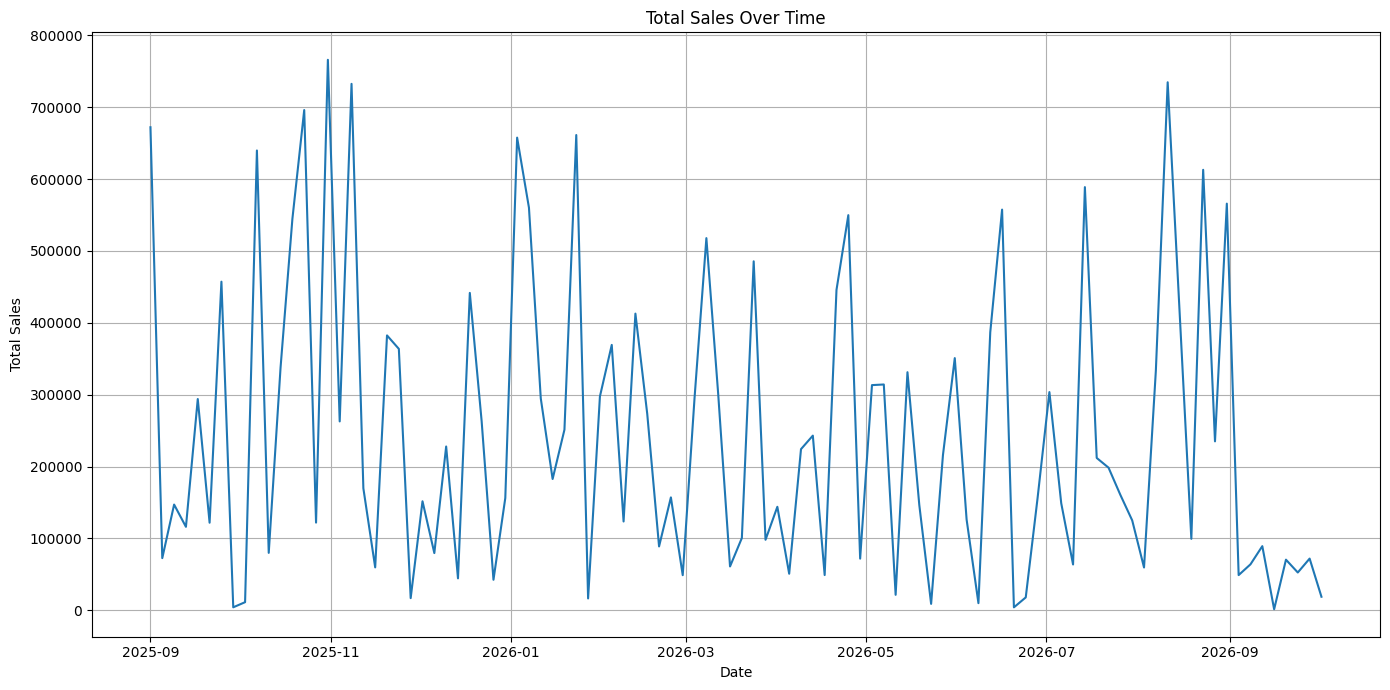

Visualizations generated successfully.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Bar chart for Total Sales by Product
sns.barplot(x='Product', y='TotalSales', data=sales_by_product)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Set figure size for better readability
plt.figure(figsize=(14, 7))

# Line plot for Total Sales Over Time
sns.lineplot(x='DATE', y='TotalSales', data=sales_over_time)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True) # Add a grid for easier reading of values
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
print("Visualizations generated successfully.")

## Final Task

### Subtask:
Provide a summary of the insights gained from the ETL process and the generated visualizations, highlighting key findings from the sales data.


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained 102 entries with 8 columns, including `OrderID`, `DATE`, `CustomerID`, `Region`, `Product`, `Quantity`, `UnitPrice`, and `TotalSales`.
*   Data cleaning involved:
    *   Converting the `DATE` column from `object` to `datetime64[ns]` format.
    *   Removing 1 duplicate row.
    *   Dropping rows with missing values, resulting in a final cleaned dataset of 100 entries with no missing values.
*   The `TotalSales` column was verified and confirmed to be accurately calculated as `Quantity * UnitPrice` for all entries, requiring no recalculation.
*   Aggregated sales data revealed key insights:
    *   **Top 5 Products by Total Sales**: Webcam (\$4,780,776), Keyboard (\$4,726,928), Router (\$3,749,558), Laptop (\$3,598,643), and Printer (\$2,934,611).
    *   Daily total sales were aggregated to identify sales trends over time.
*   Visualizations included a bar chart showing total sales by product and a line plot illustrating total sales trends over time, providing a clear overview of sales performance.

### Insights or Next Steps

*   **Insight**: The sales data clearly identifies "Webcam" and "Keyboard" as the top-performing products, significantly contributing to overall revenue. Marketing or inventory strategies could prioritize these high-value items.
*   **Next Step**: Analyze sales trends over time in conjunction with marketing campaigns or product launches to identify correlations and optimize future strategies. Further investigation into regional sales performance or customer demographics could provide deeper insights.
